# Data Science Challenge

In [2]:
# If you'd like to install packages that aren't installed by default, uncomment the last two lines of this cell and replace <package list> with a list of your packages.
# This will ensure your notebook has all the dependencies and works everywhere

#import sys
#!{sys.executable} -m pip install <package list>

In [1]:
#Libraries
import pandas as pd
pd.set_option("display.max_columns", 101)

## Data Description

Column | Description
:---|:---
`id` | Unique Identifier
`brand` | The brand name of the product
`capacity` | The volume of each container (lt/ml)
`city`| The name of the city for each shop 
`container`| The type (nature) of the container.
`date`| Date of sale
`lat`| The latitude of the shop
`long`| The longitude of the shop
`pop` | Population of the city (assumed constant)
`shop` | the shop id
`price`| The average monthly price of the corresponding container (in US `$$`)
`quantity` | The number of containers sold in a month (target variable)

## Data Wrangling & Visualization

In [2]:
data = pd.read_csv('train.csv', index_col=0)

In [3]:
data.head()

,date,city,lat,long,pop,shop,brand,container,capacity,price,quantity
id,,,,,,,,,,,
0.0,31/01/12,Athens,37.97945,23.71622,672130.0,shop_1,kinder-cola,glass,500ml,0.96,13280.0
1.0,31/01/12,Athens,37.97945,23.71622,672130.0,shop_1,kinder-cola,plastic,1.5lt,2.86,6727.0
2.0,31/01/12,Athens,37.97945,23.71622,672130.0,shop_1,kinder-cola,can,330ml,0.87,9848.0
3.0,31/01/12,Athens,37.97945,23.71622,672130.0,shop_1,adult-cola,glass,500ml,1.00,20050.0
4.0,31/01/12,Athens,37.97945,23.71622,672130.0,shop_1,adult-cola,can,330ml,0.39,25696.0


In [4]:
#Explore columns
data.columns

Index(['date', 'city', 'lat', 'long', 'pop', 'shop', 'brand', 'container',
       'capacity', 'price', 'quantity'],
      dtype='object')

In [5]:
#Description
data.describe()

,lat,long,pop,price,quantity
count,6429.000000,6434.000000,6480.000000,6480.000000,6480.000000
mean,38.301238,23.270246,355141.416667,1.188981,29431.855093
std,1.649771,1.086960,232828.796289,0.814567,17901.328301
min,35.327870,21.734440,134219.000000,0.110000,2953.000000
25%,37.962450,22.417610,141439.750000,0.610000,16441.750000
50%,38.244440,22.930860,257501.500000,0.920000,25184.000000
75%,39.636890,23.716220,665871.000000,1.500000,37866.000000
max,40.643610,25.143410,672130.000000,4.540000,145287.000000


## Visualization, Modeling, Machine Learning

Can you predict future demand and identify how different features influence that? Please explain your findings effectively to technical and non-technical audiences using comments and visualizations, if appropriate.
- **Build an optimized model that effectively solves the business problem.**
- **The model would be evaluated on the basis of mean absolute percent error.**
- **Read the Test.csv file and prepare features for testing.**

In [6]:
#Loading Test data
test_data=pd.read_csv('test.csv')
test_data.head()

,id,date,city,lat,long,pop,shop,brand,container,capacity,price
0,6480,31-01-18,Athens,37.97945,23.71622,664046,shop_1,kinder-cola,plastic,1.5lt,3.10
1,6481,31-01-18,Athens,37.97945,23.71622,664046,shop_1,kinder-cola,can,330ml,0.85
2,6482,31-01-18,Athens,37.97945,23.71622,664046,shop_1,adult-cola,glass,500ml,0.83
3,6483,31-01-18,Athens,37.97945,23.71622,664046,shop_1,orange-power,glass,500ml,0.54
4,6484,31-01-18,Athens,37.97945,23.71622,664046,shop_1,orange-power,plastic,1.5lt,0.83


In [7]:

import numpy as np
import matplotlib.pyplot as plt
import re

In [9]:
train = pd.read_csv("train.csv")     # keep index as is
test  = pd.read_csv("test.csv")

# parse date that looks like 31/01/12
train["date"] = pd.to_datetime(train["date"], dayfirst=True, errors="coerce")
test["date"]  = pd.to_datetime(test["date"],  dayfirst=True, errors="coerce")

/var/folders/fd/xpg236695cn5cp5bztdhzf0c0000gn/T/ipykernel_37687/4186470798.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  train["date"] = pd.to_datetime(train["date"], dayfirst=True, errors="coerce")
/var/folders/fd/xpg236695cn5cp5bztdhzf0c0000gn/T/ipykernel_37687/4186470798.py:6: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  test["date"]  = pd.to_datetime(test["date"],  dayfirst=True, errors="coerce")


In [10]:

def capacity_to_ml(x):
    if pd.isna(x):
        return np.nan
    s = str(x).strip().lower().replace(" ", "")
    m = re.match(r"([0-9]*\.?[0-9]+)\s*(ml|l|lt)?", s)
    if not m:
        return np.nan
    val = float(m.group(1))
    unit = m.group(2) or ""
    if unit == "ml":
        return val
    if unit in {"l", "lt"}:
        return val * 1000

    return val if val > 10 else val * 1000

train["capacity_ml"] = train["capacity"].apply(capacity_to_ml)
test["capacity_ml"]  = test["capacity"].apply(capacity_to_ml)


for df in (train, test):
    df["year"] = df["date"].dt.year
    df["month"] = df["date"].dt.month
    df["day"] = df["date"].dt.day
    df["dow"] = df["date"].dt.dayofweek
    df["is_month_end"] = df["date"].dt.is_month_end.astype(int)
    df["is_month_start"] = df["date"].dt.is_month_start.astype(int)

print("Shapes - train, test:", train.shape, test.shape)
display(train.head())

print("\nDtypes:")
print(train.dtypes)

print("\nNulls per column:")
print(train.isna().sum().sort_values(ascending=False))

print("\nUnique counts for categoricals:")
for c in ["brand", "city", "container", "shop"]:
    if c in train.columns:
        print(c, train[c].nunique())

print("\nTarget describe:")
print(train["quantity"].describe())



Shapes - train, test: (7560, 19) (1080, 18)


,id,date,city,lat,long,pop,shop,brand,container,capacity,price,quantity,capacity_ml,year,month,day,dow,is_month_end,is_month_start
0,0.0,2012-01-31,Athens,37.97945,23.71622,672130.0,shop_1,kinder-cola,glass,500ml,0.96,13280.0,500.0,2012.0,1.0,31.0,1.0,1,0
1,1.0,2012-01-31,Athens,37.97945,23.71622,672130.0,shop_1,kinder-cola,plastic,1.5lt,2.86,6727.0,1500.0,2012.0,1.0,31.0,1.0,1,0
2,2.0,2012-01-31,Athens,37.97945,23.71622,672130.0,shop_1,kinder-cola,can,330ml,0.87,9848.0,330.0,2012.0,1.0,31.0,1.0,1,0
3,3.0,2012-01-31,Athens,37.97945,23.71622,672130.0,shop_1,adult-cola,glass,500ml,1.00,20050.0,500.0,2012.0,1.0,31.0,1.0,1,0
4,4.0,2012-01-31,Athens,37.97945,23.71622,672130.0,shop_1,adult-cola,can,330ml,0.39,25696.0,330.0,2012.0,1.0,31.0,1.0,1,0



Dtypes:
id                       float64
date              datetime64[ns]
city                      object
lat                      float64
long                     float64
pop                      float64
shop                      object
brand                     object
container                 object
capacity                  object
price                    float64
quantity                 float64
capacity_ml              float64
year                     float64
month                    float64
day                      float64
dow                      float64
is_month_end               int64
is_month_start             int64
dtype: object

Nulls per column:
lat               1131
long              1126
container         1096
capacity          1095
capacity_ml       1095
quantity          1080
dow               1080
day               1080
month             1080
year              1080
id                1080
price             1080
date              1080
brand             1080
shop     

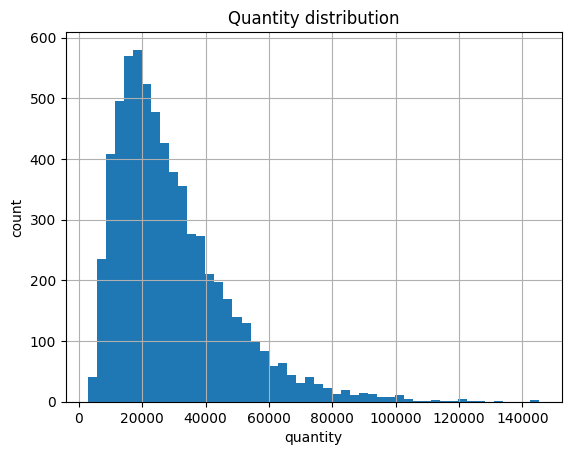

,corr_with_quantity
quantity,1.000000
day,0.154326
month,0.093151
dow,0.015970
lat,0.007324
id,-0.013881
year,-0.028976
long,-0.156031
pop,-0.213501
capacity_ml,-0.286208


In [11]:

plt.figure()
train["quantity"].hist(bins=50)
plt.title("Quantity distribution")
plt.xlabel("quantity")
plt.ylabel("count")
plt.show()

# numeric correlations with target
num_cols = train.select_dtypes(include=np.number).columns.tolist()
if "quantity" in num_cols:
    num_cols.remove("quantity")
corrs = train[num_cols + ["quantity"]].corr(numeric_only=True)["quantity"].sort_values(ascending=False)
display(corrs.to_frame("corr_with_quantity").head(20))

In [12]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import make_scorer, mean_absolute_percentage_error
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:

print("Before:", train.shape)
train = train.dropna(subset=["quantity"])
print("After :", train.shape)


y = train["quantity"]
X = train.drop(columns=["quantity"])

print("Number of NaNs in target after cleaning:", y.isna().sum())


Before: (7560, 19)
After : (6480, 19)
Number of NaNs in target after cleaning: 0


In [16]:



target_col = "quantity"
y = train[target_col]
X = train.drop(columns=[target_col])


num_cols = X.select_dtypes(include=np.number).columns.tolist()
cat_cols = X.select_dtypes(exclude=np.number).columns.tolist()

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler(with_mean=False))
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore', min_frequency=0.01))
])

preprocess = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, num_cols),
        ('cat', categorical_transformer, cat_cols)
    ],
    remainder='drop'
)


models = {
    "LinearRegression": LinearRegression(),
    "RandomForest": RandomForestRegressor(
        n_estimators=400, random_state=42, n_jobs=-1),
    "GradientBoosting": GradientBoostingRegressor(random_state=42)
}

def cv_mape(model):
    pipe = Pipeline(steps=[('prep', preprocess), ('model', model)])
    cv = KFold(n_splits=5, shuffle=True, random_state=42)
    scores = cross_val_score(
        pipe, X, y,
        scoring=make_scorer(mean_absolute_percentage_error, greater_is_better=False),
        cv=cv, n_jobs=-1
    )
    return -scores.mean()


results = {}
for name, model in models.items():
    mape = cv_mape(model)
    results[name] = mape
    print(f"{name}: MAPE = {mape:.4f}")

best_name = min(results, key=results.get)
print("\nBest model:", best_name)


best_model = models[best_name]
final_pipe = Pipeline(steps=[('prep', preprocess), ('model', best_model)])
final_pipe.fit(X, y)

preds = final_pipe.predict(test)
preds = np.clip(preds, 0, None)



LinearRegression: MAPE = 0.3109
RandomForest: MAPE = 0.1349
GradientBoosting: MAPE = 0.1559

Best model: RandomForest




**The management wants to know what are the most important features for your model.  Can you tell them?**

> #### Task:
- **Visualize the top 20 features and their feature importance.**


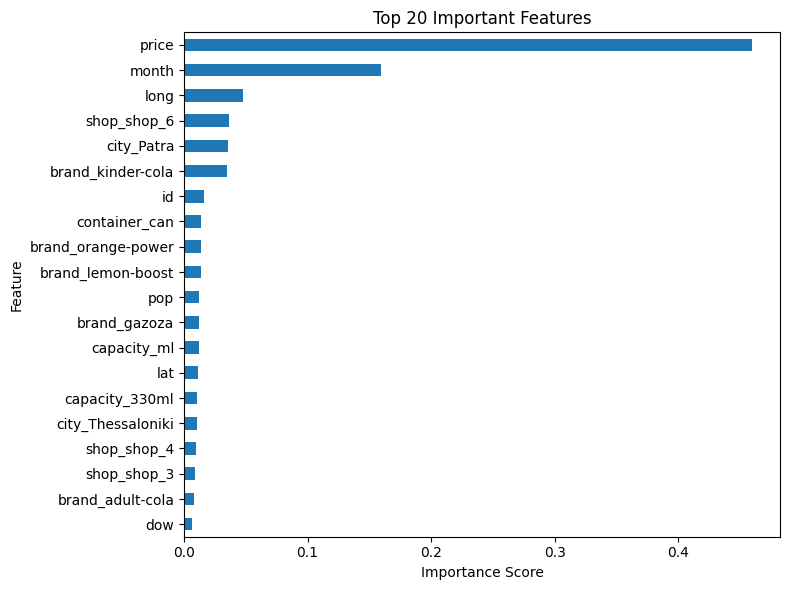

price                 0.459486
month                 0.159496
long                  0.047680
shop_shop_6           0.036706
city_Patra            0.035778
brand_kinder-cola     0.035152
id                    0.016355
container_can         0.014093
brand_orange-power    0.014076
brand_lemon-boost     0.013880
pop                   0.012405
brand_gazoza          0.012255
capacity_ml           0.011826
lat                   0.011500
capacity_330ml        0.010511
city_Thessaloniki     0.010237
shop_shop_4           0.010052
shop_shop_3           0.009181
brand_adult-cola      0.008176
dow                   0.006774
dtype: float64

In [17]:

ohe = final_pipe.named_steps['prep'].named_transformers_['cat'].named_steps['onehot']
cat_feature_names = ohe.get_feature_names_out(cat_cols)
num_feature_names = num_cols
all_feature_names = np.concatenate([num_feature_names, cat_feature_names])

model = final_pipe.named_steps['model']


if hasattr(model, "feature_importances_"):
    importances = model.feature_importances_
    fi = pd.Series(importances, index=all_feature_names).sort_values(ascending=False).head(20)

    plt.figure(figsize=(8,6))
    fi.sort_values().plot(kind="barh")
    plt.title("Top 20 Important Features")
    plt.xlabel("Importance Score")
    plt.ylabel("Feature")
    plt.tight_layout()
    plt.show()

    display(fi)
else:

    if hasattr(model, "coef_"):
        coefs = pd.Series(model.coef_.ravel(), index=all_feature_names)
        fi = coefs.abs().sort_values(ascending=False).head(20)

        plt.figure(figsize=(8,6))
        fi.sort_values().plot(kind="barh")
        plt.title("Top 20 Influential Features (absolute coefficients)")
        plt.xlabel("Coefficient magnitude")
        plt.ylabel("Feature")
        plt.tight_layout()
        plt.show()

        display(fi)
    else:
        print("This model type does not provide feature importance directly.")


 
Price is the most influential feature, showing strong price sensitivity in sales.  
Month also has a high impact, suggesting clear seasonal demand trends.  
Location (longitude, city, shop) and brand-related features contribute moderately,  
indicating regional and product-specific effects on quantity sold.


> #### Task:
- **Submit the predictions on the test dataset using your optimized model.** <br/>
    For each record in the test set (`Test.csv`), you must predict the value of the `quantity` variable. You should submit a CSV file with a header row and one row per test entry. 
The file (`submissions.csv`) should have exactly 2 columns:
   - **id**
   - **quantity**

In [18]:

submission = pd.DataFrame({
    'id': test['id'],
    'quantity': preds
})


In [20]:
#Submission
submission.to_csv('submissions.csv',index=False)

---